# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | midvagur
Processing Record 2 of Set 1 | walvis bay
Processing Record 3 of Set 1 | orsa
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | libourne
Processing Record 10 of Set 1 | muramvya
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | dori
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | kingston
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | quelimane
Processing Record 21 of Set 1 | sharypovo
Processing Record 22 of Set 1 | ancud
Proc

Processing Record 42 of Set 4 | concepcion
Processing Record 43 of Set 4 | ust'-uda
Processing Record 44 of Set 4 | karlskrona
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | saint croix
Processing Record 47 of Set 4 | aioun
Processing Record 48 of Set 4 | port augusta
Processing Record 49 of Set 4 | sinop
Processing Record 0 of Set 5 | sarai
Processing Record 1 of Set 5 | fale old settlement
Processing Record 2 of Set 5 | ar raqqah
Processing Record 3 of Set 5 | huron
Processing Record 4 of Set 5 | olyokminsk
Processing Record 5 of Set 5 | lazaro cardenas
Processing Record 6 of Set 5 | pelotas
Processing Record 7 of Set 5 | south grafton
Processing Record 8 of Set 5 | utrik
Processing Record 9 of Set 5 | gulf breeze
Processing Record 10 of Set 5 | kruisfontein
Processing Record 11 of Set 5 | west island
Processing Record 12 of Set 5 | ligaya
Processing Record 13 of Set 5 | saudarkrokur
Processing Record 14 of Set 5 | saipan
Processing Record 15 of Set 5 | tura
Pr

Processing Record 35 of Set 8 | kumru
Processing Record 36 of Set 8 | tongliao
Processing Record 37 of Set 8 | areia branca
Processing Record 38 of Set 8 | pariaman
Processing Record 39 of Set 8 | sebastopol
Processing Record 40 of Set 8 | summerland
Processing Record 41 of Set 8 | valdosta
Processing Record 42 of Set 8 | altay
Processing Record 43 of Set 8 | pavlodar
Processing Record 44 of Set 8 | selfoss
Processing Record 45 of Set 8 | kulia village
City not found. Skipping...
Processing Record 46 of Set 8 | saldanha
Processing Record 47 of Set 8 | schwandorf in bayern
Processing Record 48 of Set 8 | cafayate
Processing Record 49 of Set 8 | vernon
Processing Record 0 of Set 9 | tonj
Processing Record 1 of Set 9 | reggane
Processing Record 2 of Set 9 | tsiombe
Processing Record 3 of Set 9 | langtoucun
Processing Record 4 of Set 9 | luderitz
Processing Record 5 of Set 9 | arendal
Processing Record 6 of Set 9 | weyburn
Processing Record 7 of Set 9 | queenstown
Processing Record 8 of Se

Processing Record 24 of Set 12 | sidney
Processing Record 25 of Set 12 | idri
Processing Record 26 of Set 12 | hinna
Processing Record 27 of Set 12 | palikir - national government center
Processing Record 28 of Set 12 | zhangye
Processing Record 29 of Set 12 | inari
Processing Record 30 of Set 12 | ujae
Processing Record 31 of Set 12 | kragero
Processing Record 32 of Set 12 | acajutla
Processing Record 33 of Set 12 | willowmore
Processing Record 34 of Set 12 | bandarbeyla
Processing Record 35 of Set 12 | kushiro
Processing Record 36 of Set 12 | ceelbuur
Processing Record 37 of Set 12 | wulingyuan
Processing Record 38 of Set 12 | bac lieu
Processing Record 39 of Set 12 | pimentel
Processing Record 40 of Set 12 | thief river falls
Processing Record 41 of Set 12 | xapuri
Processing Record 42 of Set 12 | faya-largeau
Processing Record 43 of Set 12 | bam
Processing Record 44 of Set 12 | nantucket
Processing Record 45 of Set 12 | kataragama
City not found. Skipping...
Processing Record 46 of

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,midvagur,62.0511,-7.1939,-3.54,74,66,1.03,FO,1707118468
1,walvis bay,-22.9575,14.5053,18.94,75,33,2.74,NA,1707118468
2,orsa,54.5153,30.4053,-1.40,93,100,4.46,BY,1707118469
3,hamilton,39.1834,-84.5333,3.21,71,0,7.20,US,1707118435
4,blackmans bay,-43.0167,147.3167,21.07,45,33,1.34,AU,1707118469


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,midvagur,62.0511,-7.1939,-3.54,74,66,1.03,FO,1707118468
1,walvis bay,-22.9575,14.5053,18.94,75,33,2.74,NaN,1707118468
2,orsa,54.5153,30.4053,-1.40,93,100,4.46,BY,1707118469
3,hamilton,39.1834,-84.5333,3.21,71,0,7.20,US,1707118435
4,blackmans bay,-43.0167,147.3167,21.07,45,33,1.34,AU,1707118469


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

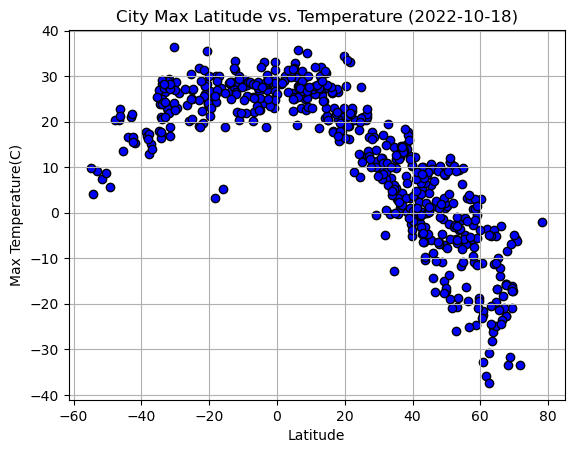

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

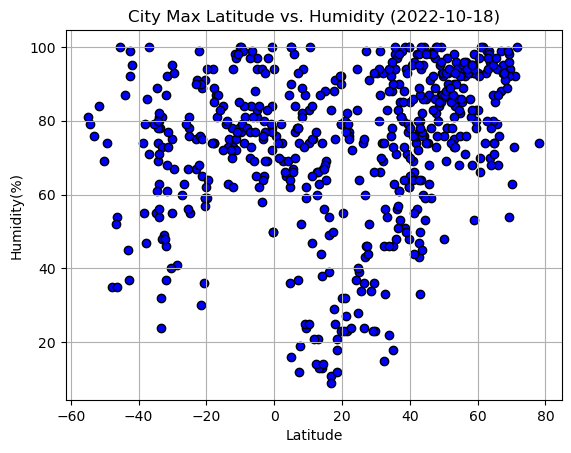

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

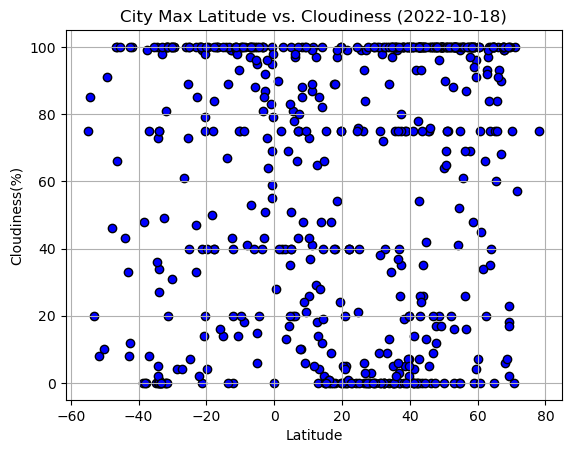

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

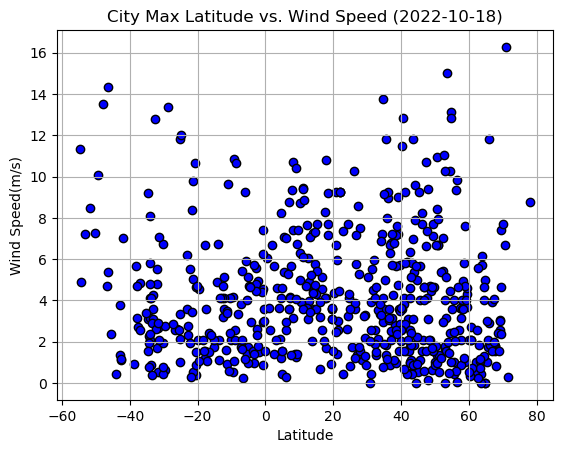

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

def linregress_plot (x_values, y_values, title="", xlabel="", ylabel=""):
    #perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values, y_values)
    #create scatter plot
    plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")
    #plot the regression line
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.plot(x_values, regression_line, label="Linear Regression Line", color="red")
    plt.annotate(line_eq,(5.8,5.8),fontsize=15,color="red")
    
    #add labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #show plot
    plt.show()
    
    print(f"The r-value is: {rvalue}")



In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,midvagur,62.0511,-7.1939,-3.54,74,66,1.03,FO,1707118468
2,orsa,54.5153,30.4053,-1.40,93,100,4.46,BY,1707118469
3,hamilton,39.1834,-84.5333,3.21,71,0,7.20,US,1707118435
6,longyearbyen,78.2186,15.6401,-2.09,74,75,8.75,SJ,1707118469
8,libourne,44.9167,-0.2500,4.28,86,13,0.53,FR,1707118470


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,walvis bay,-22.9575,14.5053,18.94,75,33,2.74,NaN,1707118468
4,blackmans bay,-43.0167,147.3167,21.07,45,33,1.34,AU,1707118469
5,punta arenas,-53.1500,-70.9167,9.06,76,20,7.20,CL,1707118469
7,port-aux-francais,-49.3500,70.2167,5.66,74,91,10.07,TF,1707118470
9,muramvya,-3.2682,29.6079,18.85,75,100,0.96,BI,1707118470


###  Temperature vs. Latitude Linear Regression Plot

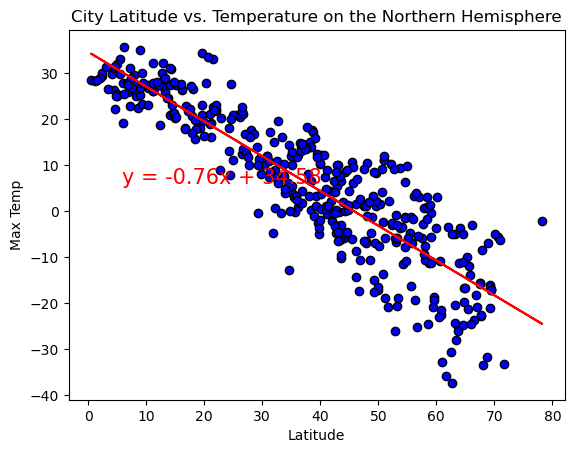

The r-value is: -0.8879792461060804


In [17]:
# Linear regression on Northern Hemisphere
linregress_plot (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], title="City Latitude vs. Temperature on the Northern Hemisphere", xlabel="Latitude", ylabel="Max Temp")

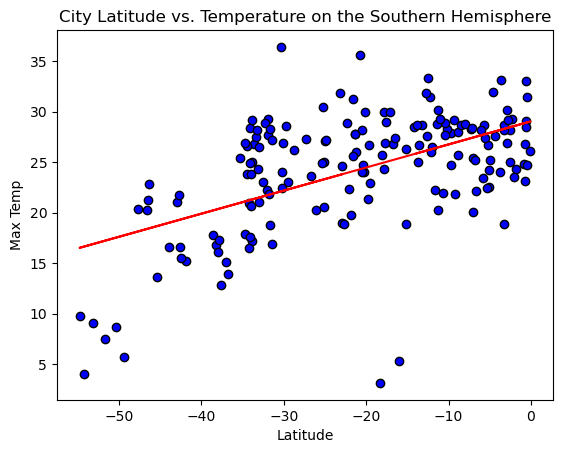

The r-value is: 0.5466821417345493


In [18]:
# Linear regression on Southern Hemisphere
linregress_plot (southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], title="City Latitude vs. Temperature on the Southern Hemisphere", xlabel="Latitude", ylabel="Max Temp")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, there is a negative correlation between temperature and latitude.

In the Souther Hemisphere, there is a positive correlation between temperature and latitude

### Humidity vs. Latitude Linear Regression Plot

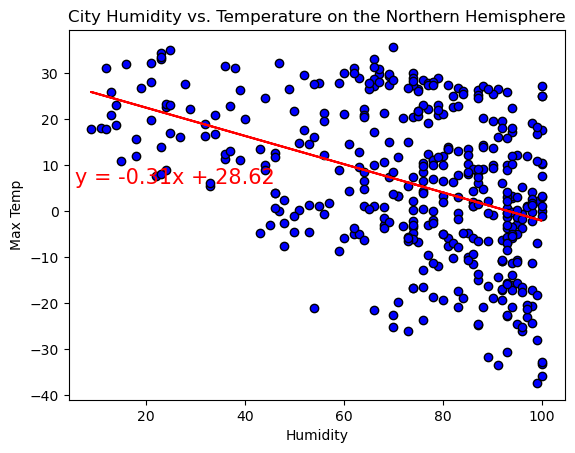

The r-value is: -0.4282230131764664


In [19]:
# Northern Hemisphere
linregress_plot (northern_hemi_df["Humidity"], northern_hemi_df["Max Temp"], title="City Humidity vs. Temperature on the Northern Hemisphere", xlabel="Humidity", ylabel="Max Temp")

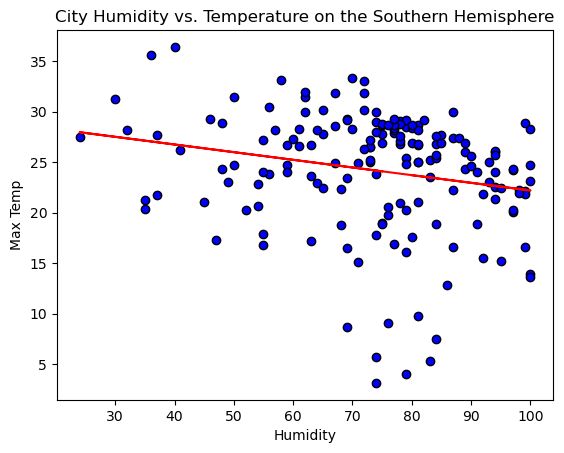

The r-value is: -0.2113584493462711


In [20]:
# Southern Hemisphere
linregress_plot (southern_hemi_df["Humidity"], southern_hemi_df["Max Temp"], title="City Humidity vs. Temperature on the Southern Hemisphere", xlabel="Humidity", ylabel="Max Temp")

**Discussion about the linear relationship:** 

Both the Northern and Southern Hemisphere have a negative correlation between Humidity and Temperature.

### Cloudiness vs. Latitude Linear Regression Plot

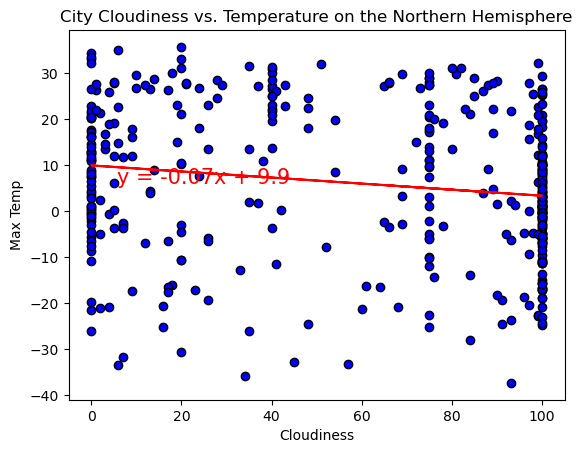

The r-value is: -0.166334077724495


In [21]:
# Northern Hemisphere
linregress_plot (northern_hemi_df["Cloudiness"], northern_hemi_df["Max Temp"], title="City Cloudiness vs. Temperature on the Northern Hemisphere", xlabel="Cloudiness", ylabel="Max Temp")

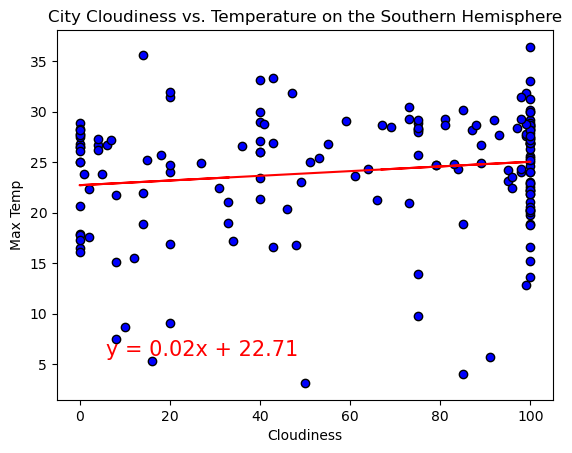

The r-value is: 0.15119987183784273


In [22]:
# Southern Hemisphere
linregress_plot (southern_hemi_df["Cloudiness"], southern_hemi_df["Max Temp"], title="City Cloudiness vs. Temperature on the Southern Hemisphere", xlabel="Cloudiness", ylabel="Max Temp")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, there is a negative correlation between cloudiness and latitude.

In the Souther Hemisphere, there is a positive correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

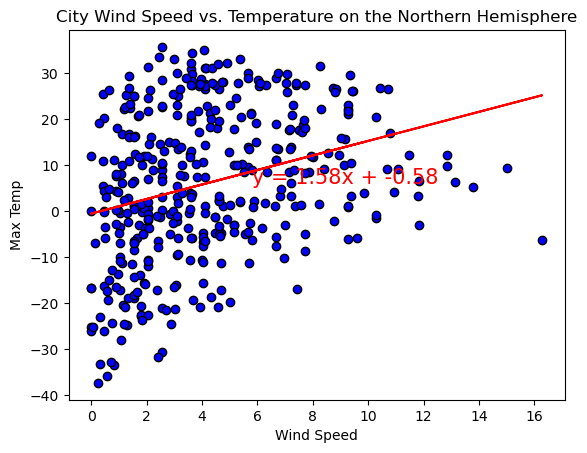

The r-value is: 0.29474088264435494


In [23]:
# Northern Hemisphere
linregress_plot (northern_hemi_df["Wind Speed"], northern_hemi_df["Max Temp"], title="City Wind Speed vs. Temperature on the Northern Hemisphere", xlabel="Wind Speed", ylabel="Max Temp")

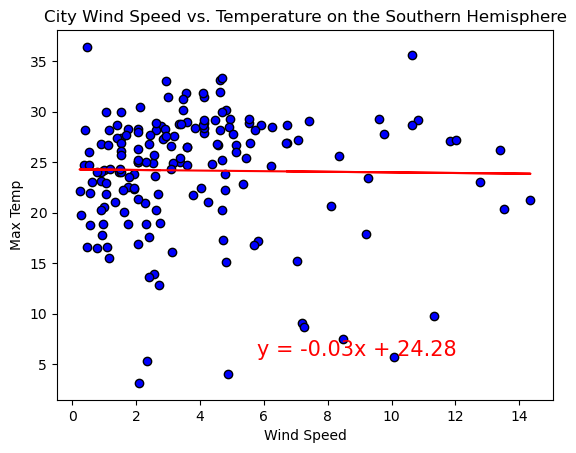

The r-value is: -0.015020127727647882


In [24]:
# Southern Hemisphere
linregress_plot (southern_hemi_df["Wind Speed"], southern_hemi_df["Max Temp"], title="City Wind Speed vs. Temperature on the Southern Hemisphere", xlabel="Wind Speed", ylabel="Max Temp")

**Discussion about the linear relationship:** 

Both the Northern and Southern Hemisphere have a positive correlation between Wind Speed and Temperature.